> Nama: **Agung Besti**

> TTL: **28-05-1995**

> Submission: **Belajar Machine Learning Untuk Pemula**

Mengimport Library yang akan digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import time
import os

Melakukan download dataset menggunakan perintah wget

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2020-12-13 01:58:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.60MB/s    in 81s     

2020-12-13 02:00:18 (3.81 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Melakukan ekstraksi pada file zip

In [3]:
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Melihat hasil dari ekstraksi zip file

In [4]:
os.listdir('rockpaperscissors')

['paper',
 'rock',
 'scissors',
 'train',
 'val',
 'rps-cv-images',
 'README_rpc-cv-images.txt']

pada hasil ekstraksi, data yang akan digunakan ada pada folder **paper**, **rock** dan **scissors**

In [5]:
#Jumlah data paper
len(os.listdir('rockpaperscissors/paper'))

712

In [6]:
#Jumlah data rock
len(os.listdir('rockpaperscissors/rock'))

726

In [7]:
#Jumlah data scissors
len(os.listdir('rockpaperscissors/scissors'))

750

In [8]:
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

#path asli dataset
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

# membuat direktori train dan validation
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

Membuat direktori untuk menampung **data generator**

In [9]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
val_paper_dir = os.path.join(validation_dir, 'paper')
val_rock_dir = os.path.join(validation_dir, 'rock')
val_scissors_dir = os.path.join(validation_dir, 'scissors')

# membuat direktori train
if not os.path.exists(train_paper_dir):
  os.mkdir(train_paper_dir)
if not os.path.exists(train_rock_dir):
  os.mkdir(train_rock_dir)
if not os.path.exists(train_scissors_dir):
  os.mkdir(train_scissors_dir)

# membuat direktori validation
if not os.path.exists(val_paper_dir):
  os.mkdir(val_paper_dir)
if not os.path.exists(val_rock_dir):
  os.mkdir(val_rock_dir)
if not os.path.exists(val_scissors_dir):
  os.mkdir(val_scissors_dir)

In [10]:
# Mengload path dataset
folder = ['paper','rock','scissors']
filenames = []
label_lists = []
for i in folder:
  for path, dirs, files in os.walk('rockpaperscissors/'+i):
    for file in files:
      if file.endswith('.png'):
        file = path + '/' + file
        filenames.append(file)
        label = path.split('/')[-1]
        label_lists.append(label)

Menampilkan sebuah dataframe berdasarkan kelas

In [11]:
import pandas as pd
df = pd.DataFrame({"name_file":filenames,'label_lists':label_lists})
df.groupby(['label_lists']).size()

label_lists
paper       712
rock        726
scissors    750
dtype: int64

In [12]:
#cek 5 data pertama
df.head()

,name_file,label_lists
0,rockpaperscissors/paper/Lq77eAG8OPaizwEd.png,paper
1,rockpaperscissors/paper/4aWP3XumkgwZtqZ7.png,paper
2,rockpaperscissors/paper/lZkRVz5sifz7CD66.png,paper
3,rockpaperscissors/paper/Zo0eTAGaUb4ewSkf.png,paper
4,rockpaperscissors/paper/L2S17RtFi8XXp6b8.png,paper


Memisahkan data berdasarkan kelas

In [13]:
papers = []
rocks = []
scissors = []
for i in range(len(df['name_file'])):
  if df['label_lists'][i] == 'paper':
    papers.append(df['name_file'][i])
  elif df['label_lists'][i] == 'rock':
    rocks.append(df['name_file'][i])
  else:
    scissors.append(df['name_file'][i])

Melihat list folder pada folder train dan validation

In [14]:
print("List folder train: "+str(os.listdir('rockpaperscissors/train')))
print("List folder val: "+str(os.listdir('rockpaperscissors/val')))

List folder train: ['paper', 'rock', 'scissors']
List folder val: ['paper', 'rock', 'scissors']


Membagi dataset menjadi **train set** dan **validation set** dengan ukuran **40% val set** dan **60% train set** berdasarkan kelas

In [15]:
# mengsplit data paper menjadi data train dan data validation
train_paper_data, val_paper_data = train_test_split(papers, test_size = 0.4)

# mmengsplit data rock menjadi data train dan data validation
train_rock_data, val_rock_data = train_test_split(rocks, test_size = 0.4)

# mengsplit data scissors menjadi data train dan data validation
train_scissors_data, val_scissors_data = train_test_split(scissors, test_size = 0.4)

In [16]:
import shutil
# mengcopy data train ke directory baru
for file in train_paper_data:
  shutil.copy(file, os.path.join(train_paper_dir))
for file in train_rock_data:
  shutil.copy(file, os.path.join(train_rock_dir))
for file in train_scissors_data:
  shutil.copy(file, os.path.join(train_scissors_dir))
# mengcopy data val ke directory baru
for file in val_paper_data:
  shutil.copy(file, os.path.join(val_paper_dir))
for file in val_rock_data:
  shutil.copy(file, os.path.join(val_rock_dir))
for file in val_scissors_data:
  shutil.copy(file, os.path.join(val_scissors_dir))

In [17]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengnormalisasi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena  merupakan masalah klasifikasi multi kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengnormalisasi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena  merupakan masalah klasifikasi multi kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
#Membuat fungsi recall untuk mengukur tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.
def rec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
#Membuat fungsi Precision untuk mengukur tingkat ketepatan antara informasi yang diminta. 
def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [20]:
# membuat model sequential dengan hyper parameter optimasi Adamax dan Nadam.
modelAdamax = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

modelNadam = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [21]:
modelAdamax.compile(loss = 'categorical_crossentropy',
              optimizer = 'adamax',
              metrics=['accuracy', prec, rec])
modelNadam.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics=['accuracy', prec, rec])

In [22]:
#Model Adamax
print("\nStart Training Model Adamax\n")
start_time = time.time()
historyAdamax = modelAdamax.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)
print("\nStop Training")
timeadamax = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))
#Model Nadam
print("\nStart Training Model Nadam\n")
start_time = time.time()
historyNadam = modelNadam.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)
print("\nStop Training")
timenadam = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))


Start Training Model Adamax

Epoch 1/20
25/25 - 41s - loss: 1.1209 - accuracy: 0.3975 - prec: 0.0237 - rec: 0.0200 - val_loss: 1.0312 - val_accuracy: 0.5250 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 2/20
25/25 - 39s - loss: 0.9146 - accuracy: 0.5925 - prec: 0.6384 - rec: 0.2925 - val_loss: 0.7615 - val_accuracy: 0.7125 - val_prec: 0.8213 - val_rec: 0.6062
Epoch 3/20
25/25 - 39s - loss: 0.6722 - accuracy: 0.7525 - prec: 0.7993 - rec: 0.6650 - val_loss: 0.4316 - val_accuracy: 0.8375 - val_prec: 0.8752 - val_rec: 0.7937
Epoch 4/20
25/25 - 39s - loss: 0.4188 - accuracy: 0.8612 - prec: 0.8876 - rec: 0.8325 - val_loss: 0.2302 - val_accuracy: 0.9312 - val_prec: 0.9419 - val_rec: 0.9187
Epoch 5/20
25/25 - 39s - loss: 0.2794 - accuracy: 0.9075 - prec: 0.9205 - rec: 0.8988 - val_loss: 0.2643 - val_accuracy: 0.9062 - val_prec: 0.9117 - val_rec: 0.9000
Epoch 6/20
25/25 - 39s - loss: 0.2307 - accuracy: 0.9175 - prec: 0.9231 - rec: 0.9150 - val_loss: 0.2020 - val_accuracy: 0.9312 - val_pre

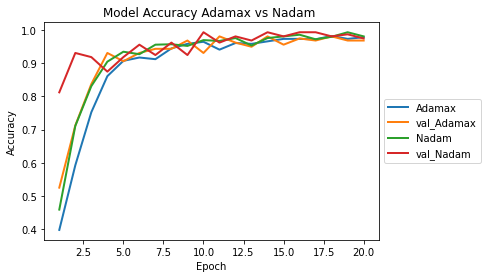

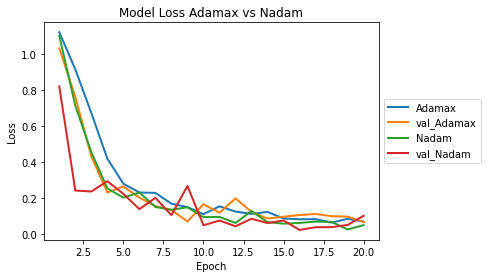

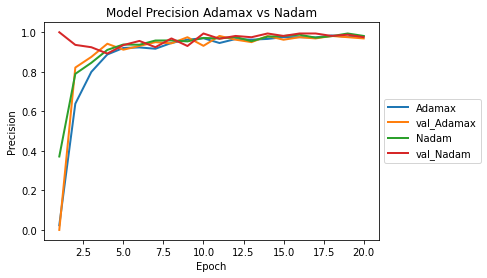

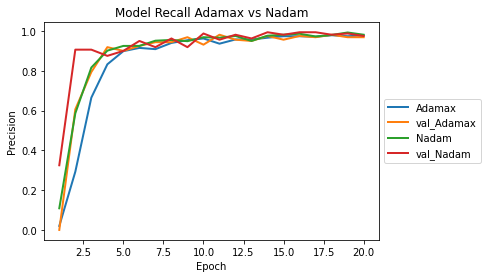

In [23]:
# visualisasi hasil data training
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']

#Adamax
acc_adamax = historyAdamax.history['accuracy']
val_acc_adamax = historyAdamax.history['val_accuracy']
loss_adamax = historyAdamax.history['loss']
val_loss_adamax = historyAdamax.history['val_loss']
prec_adamax = historyAdamax.history['prec']
val_prec_adamax = historyAdamax.history['val_prec']
rec_adamax = historyAdamax.history['rec']
val_rec_adamax = historyAdamax.history['val_rec']

#Nadam
acc_nadam = historyNadam.history['accuracy']
val_acc_nadam = historyNadam.history['val_accuracy']
loss_nadam = historyNadam.history['loss']
val_loss_nadam = historyNadam.history['val_loss']
prec_nadam = historyNadam.history['prec']
val_prec_nadam = historyNadam.history['val_prec']
rec_nadam = historyNadam.history['rec']
val_rec_nadam = historyNadam.history['val_rec']

primes = list(range(1, 21))
# Visualisasi Accuracy Model
plt.plot(primes,acc_adamax, label='Adamax', color=new_colors[0],linewidth=2)
plt.plot(primes,val_acc_adamax, label='val_Adamax', color=new_colors[1],linewidth=2)
plt.plot(primes,acc_nadam, label='Nadam', color=new_colors[2],linewidth=2)
plt.plot(primes,val_acc_nadam, label='val_Nadam', color=new_colors[3],linewidth=2)
plt.title('Model Accuracy Adamax vs Nadam ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# Visualisasi Loss Model
plt.plot(primes,loss_adamax, label='Adamax', color=new_colors[0],linewidth=2)
plt.plot(primes,val_loss_adamax, label='val_Adamax', color=new_colors[1],linewidth=2)
plt.plot(primes,loss_nadam, label='Nadam', color=new_colors[2],linewidth=2)
plt.plot(primes,val_loss_nadam, label='val_Nadam', color=new_colors[3],linewidth=2)
plt.title('Model Loss Adamax vs Nadam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# Visualisasi Precision Model
plt.plot(primes,prec_adamax, label='Adamax', color=new_colors[0],linewidth=2)
plt.plot(primes,val_prec_adamax, label='val_Adamax', color=new_colors[1],linewidth=2)
plt.plot(primes,prec_nadam, label='Nadam', color=new_colors[2],linewidth=2)
plt.plot(primes,val_prec_nadam, label='val_Nadam', color=new_colors[3],linewidth=2)
plt.title('Model Precision Adamax vs Nadam')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# Visualisasi Recall Model
plt.plot(primes,rec_adamax, label='Adamax', color=new_colors[0],linewidth=2)
plt.plot(primes,val_rec_adamax, label='val_Adamax', color=new_colors[1],linewidth=2)
plt.plot(primes,rec_nadam, label='Nadam', color=new_colors[2],linewidth=2)
plt.plot(primes,val_rec_nadam, label='val_Nadam', color=new_colors[3],linewidth=2)
plt.title('Model Recall Adamax vs Nadam')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0a3UtNzl5Ll3sq8K.png
paper


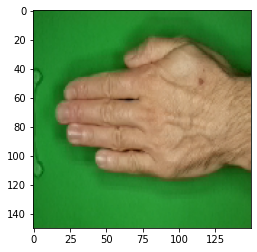

In [24]:
#Predict menggunakan Model Adamax
from google.colab import files
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = modelAdamax.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6.png
0cb6cVL8pkfi4wF6.png
paper


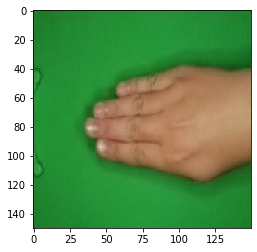

In [25]:
#Predict menggunakan Model Nadam
from google.colab import files
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = modelNadam.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')